Poulami Ghosh - Assignment 3

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import statsmodels.stats.api as sms
from statsmodels.formula.api import logit
from statsmodels.formula.api import ols
from sklearn.utils import resample 
import scipy.stats
import sklearn.metrics as sklm

from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
plt.style.use('seaborn-white')

REPORT SUMMARY:

THE RESEARCH QUESTION IN DETAIL:
WHAT KIND OF FIRMS ARE MORE LIKELY TO HAVE A VIOLATION. SO, LOOKING AT SOME CHARACTERISTICS OR EXPLANATORY VARIABLES THAT DESCRIBE FIRM ATTRIBUTES FINRA WANTS TO UNDERSTAND IF THERE IS A POSSIBILITY OF VIOLATION BY THAT FIRM. 

MODEL TO USE: SINCE THE VIOLATIONS COLUMN IS 0 OR 1 AT LEAST FOR THIS DATASET I WOULD LIKE TO ASSUME A LOGISTIC REGRESSION TO WORK ON THIS KIND OF RISK ASSESSMENT MODEL. IF MORE NUMBERS ARE THERE IN VIOLATIONS, THEN PROBABLY ORDERED LOGIT CAN BE USED. 

RISK, CLIENT BASE ARE COMING SIGNIFICANT IN MOCK LOGIT MODEL. THE TEST SCORES LOOK LIKE TO BE BIG FOR INSTITUTIONS THAN RETAIL FIRMS AND ALSO MORE SMALL FIRMS THAN LARGE FIRMS. THOUGHT THAT RISK CATEGORY WOULD BE LESS FOR LARGE INSTITUTES WITH GOOD SCORES BY BROKERS BUT INCONCLUSIVE. 

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns',200)

In [7]:
data= pd.read_excel(r'sample_data.xlsx')

In [8]:
data

,Firm ID,RISK,Ret/Inst,ClientBase,BrokerType,T1,T2,T3,T4,T5,Violations,IndustryAwards,District
0,101,3,Ret,1,small,68,70,82,58,52,0,0,1
1,102,1,Inst,2,small,68,66,82,72,72,0,0,1
2,103,3,Inst,3,small,78,78,88,52,84,0,0,1
3,104,3,Inst,1,small,74,74,84,66,64,0,0,1
4,105,3,Inst,2,small,78,62,80,78,102,0,0,1
5,106,1,Ret,3,small,84,72,84,62,78,0,0,1
6,107,3,Inst,2,small,62,72,92,78,92,0,0,1
7,108,3,Inst,2,small,100,62,80,68,62,0,0,1
8,109,3,Ret,2,small,78,82,66,84,82,0,0,1
9,110,3,Inst,2,small,68,74,92,78,62,0,0,1


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Firm ID,200.0,200.500,57.879185,101.0,150.75,200.5,250.25,300.0
RISK,200.0,2.025,0.690477,1.0,2.00,2.0,2.25,3.0
ClientBase,200.0,2.055,0.724291,1.0,2.00,2.0,3.00,3.0
T1,200.0,104.460,20.505874,56.0,88.00,100.0,120.00,152.0
T2,200.0,105.550,18.957172,62.0,91.50,108.0,120.00,134.0
T3,200.0,105.290,18.736896,66.0,90.00,104.0,118.00,150.0
T4,200.0,103.700,19.801782,52.0,88.00,106.0,116.00,148.0
T5,200.0,104.810,21.471587,52.0,92.00,104.0,122.00,142.0
Violations,200.0,0.265,0.442441,0.0,0.00,0.0,1.00,1.0
IndustryAwards,200.0,1.670,1.818691,0.0,0.00,1.0,2.00,7.0


In [15]:
corr=data.iloc[:,1:].corr()
corr

,RISK,ClientBase,T1,T2,T3,T4,T5,Violations,IndustryAwards,District
RISK,1.000000,0.017333,-0.134973,-0.181107,-0.150104,-0.189829,-0.195251,-0.038244,-0.121450,-0.192132
ClientBase,0.017333,1.000000,0.293322,0.207494,0.272459,0.282855,0.331878,0.189507,0.242737,0.319646
T1,-0.134973,0.293322,1.000000,0.596776,0.662280,0.630158,0.621484,0.489417,0.561662,0.854594
T2,-0.181107,0.207494,0.596776,1.000000,0.617449,0.570442,0.604793,0.675724,0.852110,0.818960
T3,-0.150104,0.272459,0.662280,0.617449,1.000000,0.630733,0.544480,0.541691,0.599763,0.851997
T4,-0.189829,0.282855,0.630158,0.570442,0.630733,1.000000,0.465106,0.417503,0.503471,0.833683
T5,-0.195251,0.331878,0.621484,0.604793,0.544480,0.465106,1.000000,0.387769,0.521357,0.652925
Violations,-0.038244,0.189507,0.489417,0.675724,0.541691,0.417503,0.387769,1.000000,0.814911,0.630836
IndustryAwards,-0.121450,0.242737,0.561662,0.852110,0.599763,0.503471,0.521357,0.814911,1.000000,0.746055
District,-0.192132,0.319646,0.854594,0.818960,0.851997,0.833683,0.652925,0.630836,0.746055,1.000000


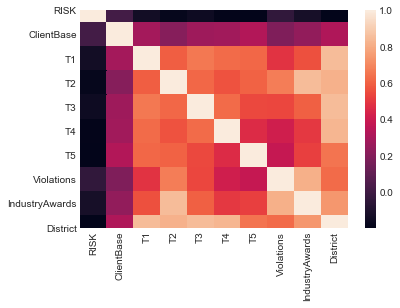

In [16]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [17]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,RISK,ClientBase,T1,T2,T3,T4,T5,Violations,IndustryAwards,District
RISK,1,0.017,-0.13,-0.18,-0.15,-0.19,-0.2,-0.038,-0.12,-0.19
ClientBase,0.017,1,0.29,0.21,0.27,0.28,0.33,0.19,0.24,0.32
T1,-0.13,0.29,1,0.6,0.66,0.63,0.62,0.49,0.56,0.85
T2,-0.18,0.21,0.6,1,0.62,0.57,0.6,0.68,0.85,0.82
T3,-0.15,0.27,0.66,0.62,1,0.63,0.54,0.54,0.6,0.85
T4,-0.19,0.28,0.63,0.57,0.63,1,0.47,0.42,0.5,0.83
T5,-0.2,0.33,0.62,0.6,0.54,0.47,1,0.39,0.52,0.65
Violations,-0.038,0.19,0.49,0.68,0.54,0.42,0.39,1,0.81,0.63
IndustryAwards,-0.12,0.24,0.56,0.85,0.6,0.5,0.52,0.81,1,0.75
District,-0.19,0.32,0.85,0.82,0.85,0.83,0.65,0.63,0.75,1


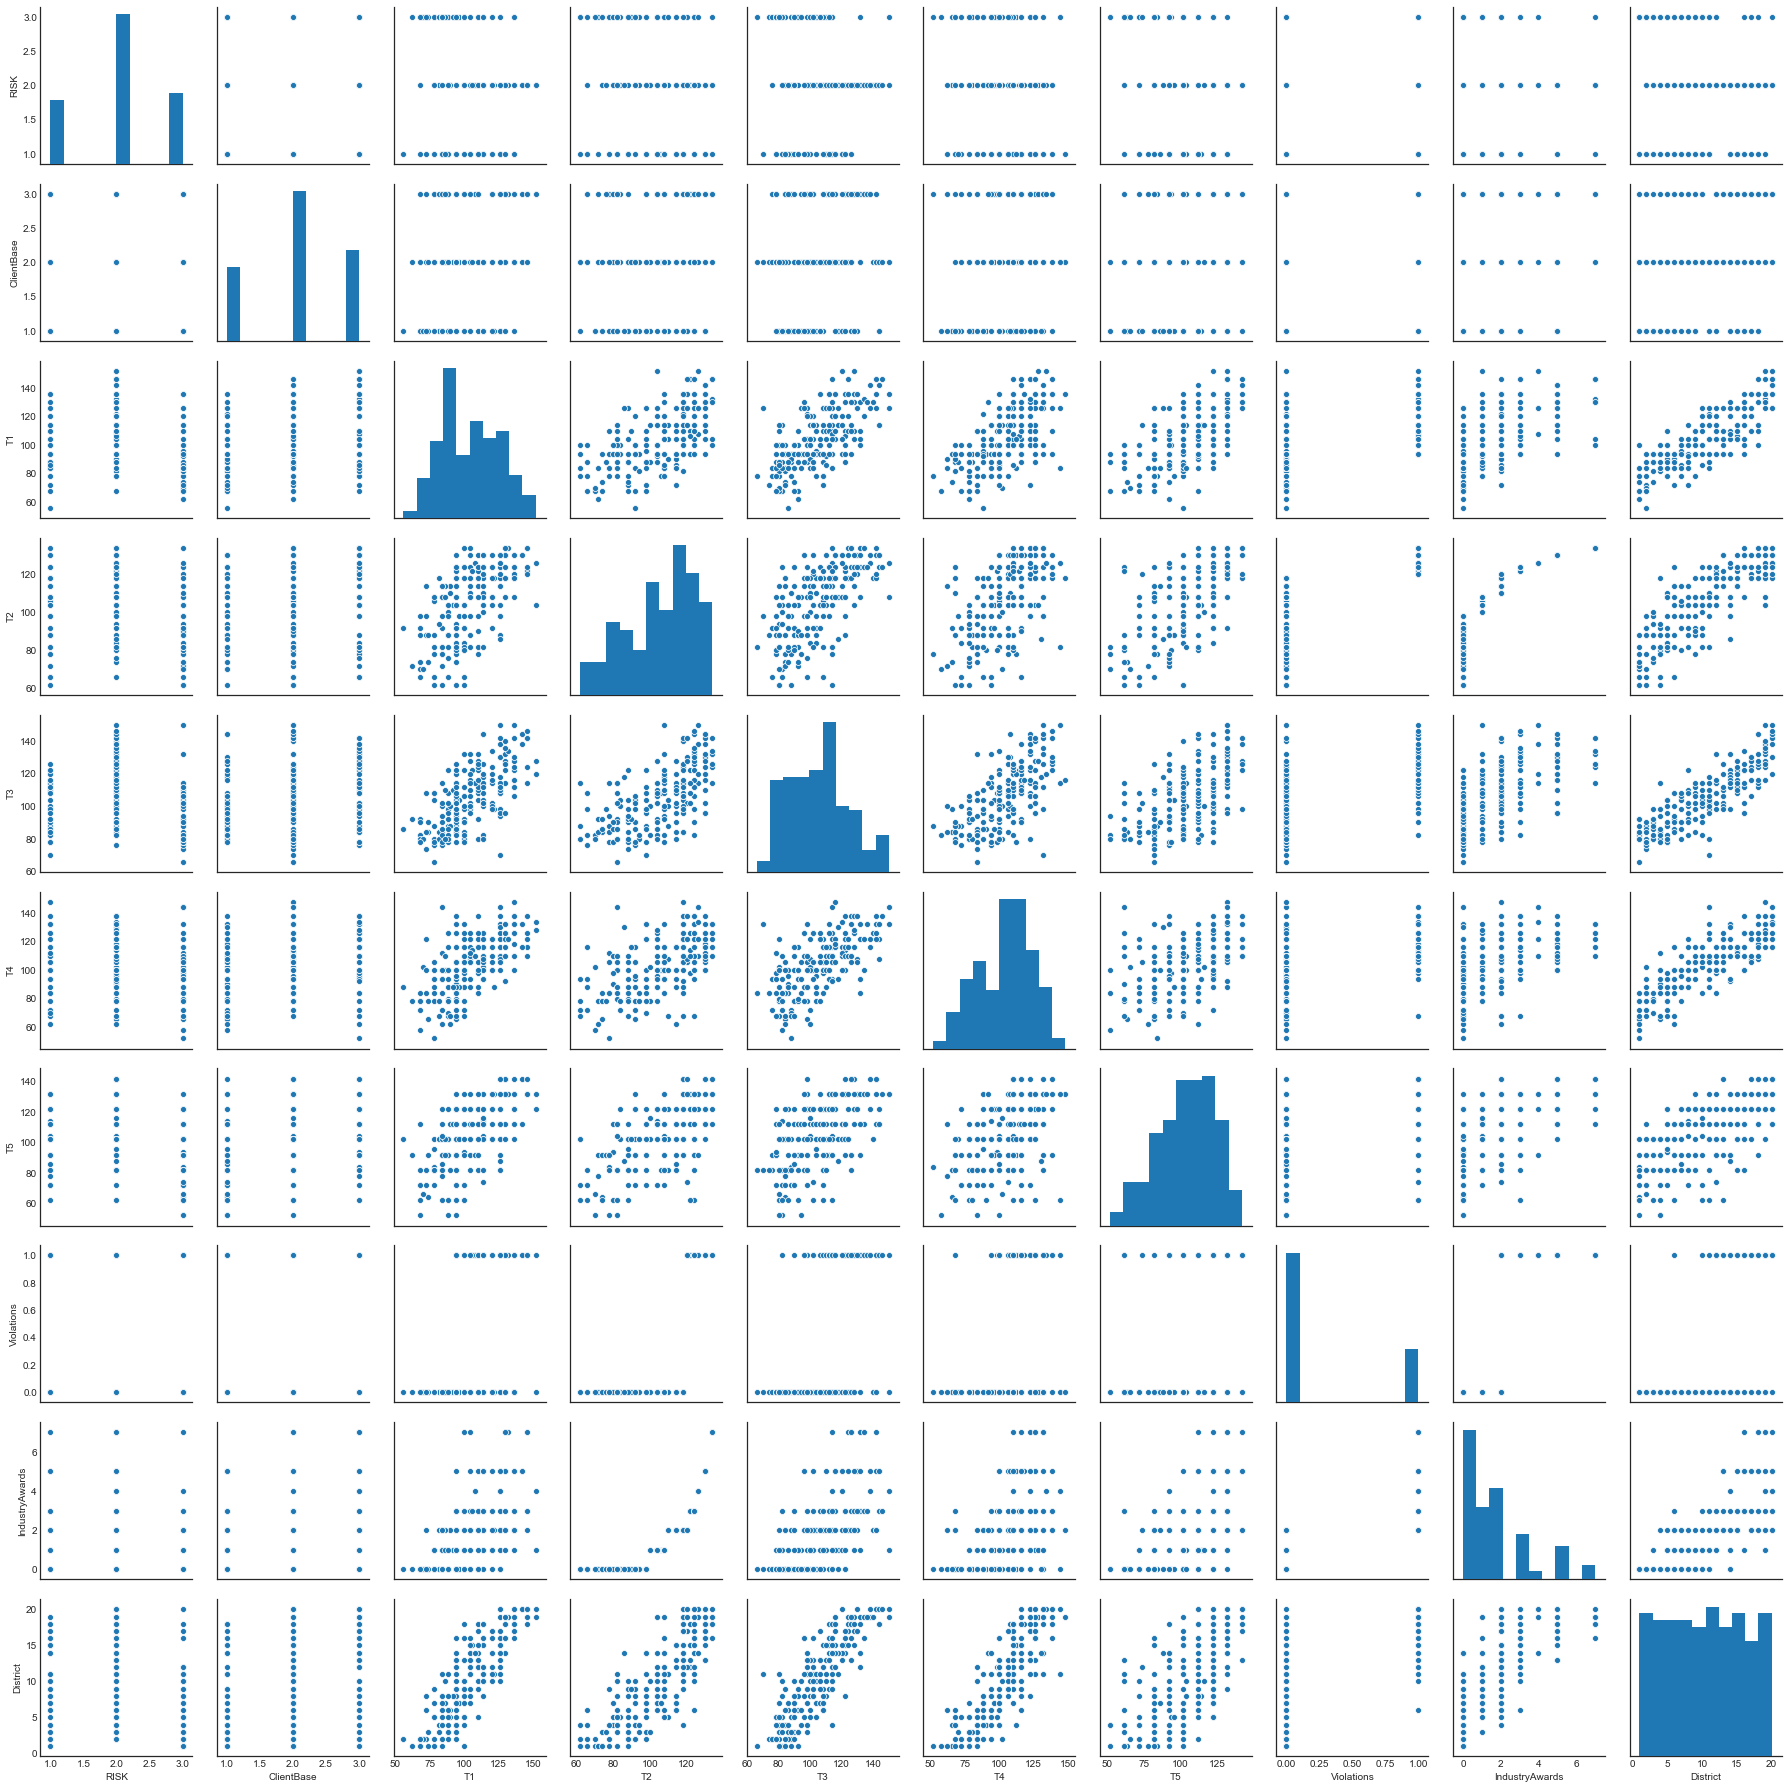

In [18]:
sns.pairplot(data.iloc[:,1:])

In [21]:
risky = data.groupby('RISK')['Ret/Inst'].count()
risky

RISK
1     45
2    105
3     50
Name: Ret/Inst, dtype: int64

In [24]:
risky2 = data.groupby(['RISK','Ret/Inst'])['Ret/Inst'].count()
risky2

RISK  Ret/Inst
1     Inst        21
      Ret         24
2     Inst        47
      Ret         58
3     Inst        23
      Ret         27
Name: Ret/Inst, dtype: int64

In [40]:
dis = data.groupby(['District','Ret/Inst'])['Ret/Inst'].count()
dis

District  Ret/Inst
1         Inst        7
          Ret         4
2         Inst        5
          Ret         5
3         Inst        3
          Ret         6
4         Inst        8
          Ret         3
5         Inst        3
          Ret         8
6         Inst        4
          Ret         5
7         Inst        2
          Ret         7
8         Inst        5
          Ret         6
9         Inst        5
          Ret         4
10        Inst        3
          Ret         7
11        Inst        5
          Ret         7
12        Inst        3
          Ret         7
13        Inst        3
          Ret         6
14        Inst        8
          Ret         2
15        Inst        6
          Ret         4
16        Inst        4
          Ret         7
17        Inst        2
          Ret         5
18        Inst        3
          Ret         7
19        Inst        7
          Ret         4
20        Inst        5
          Ret         5
Name: Ret/Inst, dtype

In [41]:
dis = data.groupby(['District','BrokerType'])['Ret/Inst'].count()
dis

District  BrokerType
1         small         11
2         small         10
3         large          1
          small          8
4         large          1
          small         10
5         large          2
          small          9
6         large          2
          small          7
7         large          2
          small          7
8         large          2
          small          9
9         small          9
10        large          3
          small          7
11        large          1
          small         11
12        large          2
          small          8
13        large          5
          small          4
14        small         10
15        large          3
          small          7
16        large          2
          small          9
17        small          7
18        large          1
          small          9
19        large          3
          small          8
20        large          2
          small          8
Name: Ret/Inst, dtype: int64

In [25]:
hist, _ = np.histogram(data['T1'], bins=[50, 70, 90, 110, 130, 150])
print( hist)

[ 8 44 65 53 28]


In [38]:
def binshist (df, name):
    hist, _ = np.histogram(df, bins=[50, 70, 90, 110, 130, 150])
    print(f"Histogram distribution of {name} average test scores")
    print(hist)
    return hist

for i , x in enumerate(data):
    if x.startswith('T'):
        binshist(data[x], x)

Histogram distribution of T1 average test scores
[ 8 44 65 53 28]
Histogram distribution of T2 average test scores
[ 8 41 58 70 23]
Histogram distribution of T3 average test scores
[ 1 45 72 59 23]
Histogram distribution of T4 average test scores
[11 43 58 68 20]
Histogram distribution of T5 average test scores
[13 32 56 67 32]


In [42]:
data['ret2']= data['Ret/Inst'].map({'Ret':0, 'Inst':1})
data['brok2']= data['BrokerType'].map({'small':1, 'large':0})

In [43]:
data

,Firm ID,RISK,Ret/Inst,ClientBase,BrokerType,T1,T2,T3,T4,T5,Violations,IndustryAwards,District,ret2,brok2
0,101,3,Ret,1,small,68,70,82,58,52,0,0,1,0,1
1,102,1,Inst,2,small,68,66,82,72,72,0,0,1,1,1
2,103,3,Inst,3,small,78,78,88,52,84,0,0,1,1,1
3,104,3,Inst,1,small,74,74,84,66,64,0,0,1,1,1
4,105,3,Inst,2,small,78,62,80,78,102,0,0,1,1,1
5,106,1,Ret,3,small,84,72,84,62,78,0,0,1,0,1
6,107,3,Inst,2,small,62,72,92,78,92,0,0,1,1,1
7,108,3,Inst,2,small,100,62,80,68,62,0,0,1,1,1
8,109,3,Ret,2,small,78,82,66,84,82,0,0,1,0,1
9,110,3,Inst,2,small,68,74,92,78,62,0,0,1,1,1


In [44]:
categorical_vars = ['Ret/Inst', 'BrokerType']
dummies = pd.get_dummies(data[categorical_vars], drop_first=True)
dummies.info()
print(dummies.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Ret/Inst_Ret        200 non-null uint8
BrokerType_small    200 non-null uint8
dtypes: uint8(2)
memory usage: 528.0 bytes
   Ret/Inst_Ret  BrokerType_small
0             1                 1
1             0                 1
2             0                 1
3             0                 1
4             0                 1


In [46]:
data.columns

Index(['Firm ID', 'RISK', 'Ret/Inst', 'ClientBase', 'BrokerType', 'T1', 'T2',
       'T3', 'T4', 'T5', 'Violations', 'IndustryAwards', 'District', 'ret2',
       'brok2'],
      dtype='object')

In [48]:
# Drop the column with the independent variable (violations), and columns for which we created dummy variables
X_ = data.drop(['Violations','ret2','brok2','Firm ID'] + categorical_vars, axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[dummies.columns]], axis=1)

# define labels y
y = data.Violations

X.head()

,RISK,ClientBase,T1,T2,T3,T4,T5,IndustryAwards,District,Ret/Inst_Ret,BrokerType_small
0,3.0,1.0,68.0,70.0,82.0,58.0,52.0,0.0,1.0,1,1
1,1.0,2.0,68.0,66.0,82.0,72.0,72.0,0.0,1.0,0,1
2,3.0,3.0,78.0,78.0,88.0,52.0,84.0,0.0,1.0,0,1
3,3.0,1.0,74.0,74.0,84.0,66.0,64.0,0.0,1.0,0,1
4,3.0,2.0,78.0,62.0,80.0,78.0,102.0,0.0,1.0,0,1


In [54]:
repscore1 = data.groupby(['District','BrokerType','Ret/Inst','RISK'])['T1'].mean()
repscore1

District  BrokerType  Ret/Inst  RISK
1         small       Inst      1        68.000000
                                3        76.666667
                      Ret       1        84.000000
                                3        71.333333
2         small       Inst      1        88.000000
                                2        73.000000
                                3        81.000000
                      Ret       1        70.000000
                                3        75.333333
3         large       Inst      2        88.000000
          small       Inst      1        88.000000
                                3        74.000000
                      Ret       1        88.000000
                                2        92.000000
                                3        85.000000
4         large       Inst      2        94.000000
          small       Inst      1        84.000000
                                2        94.000000
                                3        91.5

In [55]:
repscore2 = data.groupby(['District','BrokerType','Ret/Inst','RISK'])['T2'].mean()
repscore2

District  BrokerType  Ret/Inst  RISK
1         small       Inst      1        66.000000
                                3        70.333333
                      Ret       1        72.000000
                                3        80.000000
2         small       Inst      1        88.000000
                                2        79.000000
                                3        80.000000
                      Ret       1        85.000000
                                3        83.333333
3         large       Inst      2        76.000000
          small       Inst      1        88.000000
                                3        88.000000
                      Ret       1        98.000000
                                2        85.333333
                                3        91.000000
4         large       Inst      2        94.000000
          small       Inst      1        72.000000
                                2        80.000000
                                3        76.0

In [56]:
repscore3 = data.groupby(['District','BrokerType','Ret/Inst','RISK'])['T3'].mean()
repscore3

District  BrokerType  Ret/Inst  RISK
1         small       Inst      1        82.000000
                                3        86.000000
                      Ret       1        84.000000
                                3        76.000000
2         small       Inst      1        78.000000
                                2        83.000000
                                3        83.000000
                      Ret       1        85.000000
                                3        76.666667
3         large       Inst      2        98.000000
          small       Inst      1        92.000000
                                3        90.000000
                      Ret       1        88.000000
                                2        86.666667
                                3        80.000000
4         large       Inst      2        82.000000
          small       Inst      1       100.000000
                                2        86.000000
                                3        87.5

In [57]:
repscore4 = data.groupby(['District','BrokerType','Ret/Inst','RISK'])['T4'].mean()
repscore4

District  BrokerType  Ret/Inst  RISK
1         small       Inst      1        72.000000
                                3        70.000000
                      Ret       1        62.000000
                                3        73.333333
2         small       Inst      1        68.000000
                                2        86.000000
                                3        78.000000
                      Ret       1        86.000000
                                3        86.000000
3         large       Inst      2        78.000000
          small       Inst      1        78.000000
                                3        78.000000
                      Ret       1        70.000000
                                2        80.666667
                                3        79.000000
4         large       Inst      2        84.000000
          small       Inst      1        97.000000
                                2        90.000000
                                3        96.0

In [58]:
repscore5 = data.groupby(['District','BrokerType','Ret/Inst','RISK'])['T5'].mean()
repscore5

District  BrokerType  Ret/Inst  RISK
1         small       Inst      1        72.000000
                                3        77.666667
                      Ret       1        78.000000
                                3        72.000000
2         small       Inst      1        92.000000
                                2        77.000000
                                3        92.000000
                      Ret       1        92.000000
                                3        80.000000
3         large       Inst      2        92.000000
          small       Inst      1       102.000000
                                3        92.000000
                      Ret       1       102.000000
                                2        92.000000
                                3        82.000000
4         large       Inst      2       102.000000
          small       Inst      1        92.000000
                                2        62.000000
                                3        67.0

In [76]:
label_encoder = LabelEncoder()
n_bins = 5
changed = label_encoder.fit_transform(pd.cut(data['T1'], n_bins, retbins=True)[0])
changed

array([0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 3, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 1, 3, 3, 3, 2, 2, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2,
       3, 3, 2, 1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 4,
       2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 4, 4, 3, 2, 3, 4, 2, 4, 3, 2, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4,
       4, 4])

In [77]:
data2= data.copy(deep=True)

In [69]:
#pd.DataFrame(pd.np.column_stack([data2, changed]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,101,3,Ret,1,small,68,70,82,58,52,0,0,1,0,1,0
1,102,1,Inst,2,small,68,66,82,72,72,0,0,1,1,1,0
2,103,3,Inst,3,small,78,78,88,52,84,0,0,1,1,1,1
3,104,3,Inst,1,small,74,74,84,66,64,0,0,1,1,1,0
4,105,3,Inst,2,small,78,62,80,78,102,0,0,1,1,1,1
5,106,1,Ret,3,small,84,72,84,62,78,0,0,1,0,1,1
6,107,3,Inst,2,small,62,72,92,78,92,0,0,1,1,1,0
7,108,3,Inst,2,small,100,62,80,68,62,0,0,1,1,1,2
8,109,3,Ret,2,small,78,82,66,84,82,0,0,1,0,1,1
9,110,3,Inst,2,small,68,74,92,78,62,0,0,1,1,1,0


In [78]:
df2 = pd.DataFrame(changed, columns= ['T1cat'])
data2= pd.concat([data2, df2], axis=1)

In [79]:
data2

,Firm ID,RISK,Ret/Inst,ClientBase,BrokerType,T1,T2,T3,T4,T5,Violations,IndustryAwards,District,ret2,brok2,T1cat
0,101,3,Ret,1,small,68,70,82,58,52,0,0,1,0,1,0
1,102,1,Inst,2,small,68,66,82,72,72,0,0,1,1,1,0
2,103,3,Inst,3,small,78,78,88,52,84,0,0,1,1,1,1
3,104,3,Inst,1,small,74,74,84,66,64,0,0,1,1,1,0
4,105,3,Inst,2,small,78,62,80,78,102,0,0,1,1,1,1
5,106,1,Ret,3,small,84,72,84,62,78,0,0,1,0,1,1
6,107,3,Inst,2,small,62,72,92,78,92,0,0,1,1,1,0
7,108,3,Inst,2,small,100,62,80,68,62,0,0,1,1,1,2
8,109,3,Ret,2,small,78,82,66,84,82,0,0,1,0,1,1
9,110,3,Inst,2,small,68,74,92,78,62,0,0,1,1,1,0


In [85]:
bins= [50, 70, 90, 110, 130, 150]
def makecat(df):
    changed = label_encoder.fit_transform(pd.qcut(df, q=[0, .2, .4, .6, .8, 1], retbins=True)[0])
    df2 = pd.DataFrame(changed)
    #data2= pd.concat([data2, df2], axis=1) 
    return df2

name_list = ['T1','T2','T3','T4','T5']  
for name in name_list:
    data2[name + 'cat']= makecat(data[name])


In [86]:
data2

,Firm ID,RISK,Ret/Inst,ClientBase,BrokerType,T1,T2,T3,T4,T5,Violations,IndustryAwards,District,ret2,brok2,T1cat,T2cat,T3cat,T4cat,T5cat
0,101,3,Ret,1,small,68,70,82,58,52,0,0,1,0,1,0,0,0,0,0
1,102,1,Inst,2,small,68,66,82,72,72,0,0,1,1,1,0,0,0,0,0
2,103,3,Inst,3,small,78,78,88,52,84,0,0,1,1,1,0,0,1,0,1
3,104,3,Inst,1,small,74,74,84,66,64,0,0,1,1,1,0,0,0,0,0
4,105,3,Inst,2,small,78,62,80,78,102,0,0,1,1,1,0,0,0,0,1
5,106,1,Ret,3,small,84,72,84,62,78,0,0,1,0,1,0,0,0,0,0
6,107,3,Inst,2,small,62,72,92,78,92,0,0,1,1,1,0,0,1,0,1
7,108,3,Inst,2,small,100,62,80,68,62,0,0,1,1,1,2,0,0,0,0
8,109,3,Ret,2,small,78,82,66,84,82,0,0,1,0,1,0,0,0,0,0
9,110,3,Inst,2,small,68,74,92,78,62,0,0,1,1,1,0,0,1,0,0


In [87]:
X

,RISK,ClientBase,T1,T2,T3,T4,T5,IndustryAwards,District,Ret/Inst_Ret,BrokerType_small
0,3.0,1.0,68.0,70.0,82.0,58.0,52.0,0.0,1.0,1,1
1,1.0,2.0,68.0,66.0,82.0,72.0,72.0,0.0,1.0,0,1
2,3.0,3.0,78.0,78.0,88.0,52.0,84.0,0.0,1.0,0,1
3,3.0,1.0,74.0,74.0,84.0,66.0,64.0,0.0,1.0,0,1
4,3.0,2.0,78.0,62.0,80.0,78.0,102.0,0.0,1.0,0,1
5,1.0,3.0,84.0,72.0,84.0,62.0,78.0,0.0,1.0,1,1
6,3.0,2.0,62.0,72.0,92.0,78.0,92.0,0.0,1.0,0,1
7,3.0,2.0,100.0,62.0,80.0,68.0,62.0,0.0,1.0,0,1
8,3.0,2.0,78.0,82.0,66.0,84.0,82.0,0.0,1.0,1,1
9,3.0,2.0,68.0,74.0,92.0,78.0,62.0,0.0,1.0,0,1


In [88]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     1
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     1
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    1
1

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [92]:
print("train: " + str(len(X_train)))
print("test: " + str(len(X_test)))

train: 120
test: 80


In [95]:
X.columns

Index(['RISK', 'ClientBase', 'T1', 'T2', 'T3', 'T4', 'T5', 'IndustryAwards',
       'District', 'Ret/Inst_Ret', 'BrokerType_small'],
      dtype='object')

In [96]:
exogenous=['RISK', 'ClientBase', 'T1', 'T2', 'T3', 'IndustryAwards',
           'District', 'Ret/Inst_Ret', 'BrokerType_small']
logit_model1=sm.Logit(y_train,X_train[exogenous])
result1=logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.049248
         Iterations 14
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.918     
Dependent Variable: Violations       AIC:              29.8194   
Date:               2020-11-13 10:25 BIC:              54.9069   
No. Observations:   120              Log-Likelihood:   -5.9097   
Df Model:           8                LL-Null:          -72.436   
Df Residuals:       111              LLR p-value:      6.5821e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     14.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
RISK              1.4027   2.0309  0.6907 0.4898  -2.5779  5.3833
ClientBase       -3.8754   4.0124 -0.9659 0.3341 -11.7396  3.9887

In [98]:
# Drop the column with the independent variable (violations), and columns for which we created dummy variables
X2_ = data2.drop(['Violations','ret2','brok2','Firm ID'] + categorical_vars+ name_list, axis=1).astype('float64')

# Define the feature set X.
X2 = pd.concat([X2_, dummies[dummies.columns]], axis=1)

# define labels y
y2 = data.Violations

X2.head()

,RISK,ClientBase,IndustryAwards,District,T1cat,T2cat,T3cat,T4cat,T5cat,Ret/Inst_Ret,BrokerType_small
0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
2,3.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,1
3,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
4,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1


In [99]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.40, random_state=0)

In [100]:
logit_model2=sm.Logit(y_train2,X_train2)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.167991
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.722     
Dependent Variable: Violations       AIC:              62.3179   
Date:               2020-11-13 10:29 BIC:              92.9803   
No. Observations:   120              Log-Likelihood:   -20.159   
Df Model:           10               LL-Null:          -72.436   
Df Residuals:       109              LLR p-value:      6.6536e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
RISK              -1.9813   0.8900 -2.2262 0.0260 -3.7256 -0.2370
ClientBase        -1.8636   0.7537 -2.4727 0.0134 -3.3408 -0.3865

In [101]:
odds2=np.exp(result2.params)
print(odds2)

RISK                 0.137888
ClientBase           0.155111
IndustryAwards      97.665340
District             0.825206
T1cat                1.974369
T2cat                0.190815
T3cat                2.569484
T4cat                1.298165
T5cat                0.759977
Ret/Inst_Ret         1.309270
BrokerType_small     1.458933
dtype: float64


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
y_pred = logreg.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.8f}'.format(logreg.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.88750000


In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_pred)
print(confusion_matrix)

[[55  7]
 [ 2 16]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        62
           1       0.70      0.89      0.78        18

    accuracy                           0.89        80
   macro avg       0.83      0.89      0.85        80
weighted avg       0.90      0.89      0.89        80



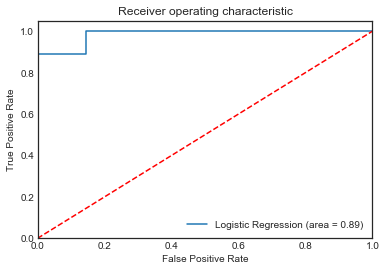

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test2, logreg.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, logreg.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()